# Decision Tree Algorithm


In [1]:
import pandas as pd 
import numpy as np 
from  sklearn.tree  import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv("C:/Users/Gaurav Tiwari/Desktop/Jupyter Notebook Files/Internship/DTA/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape  # Identifying the size of the dataset

(150, 6)

In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
X = df[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

In [6]:
X[0:5]

array([[1. , 5.1, 3.5, 1.4, 0.2],
       [2. , 4.9, 3. , 1.4, 0.2],
       [3. , 4.7, 3.2, 1.3, 0.2],
       [4. , 4.6, 3.1, 1.5, 0.2],
       [5. , 5. , 3.6, 1.4, 0.2]])

In [7]:
y = df[["Species"]]

In [8]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (105, 5) &  Size of Y training set (105, 1)


In [9]:
SpeciesTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
SpeciesTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [10]:
SpeciesTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [11]:
SpeciesPredTree = SpeciesTree.predict(X_testset)

In [12]:
print (SpeciesPredTree [0:5])
print (y_testset [0:5])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
        Species
47  Iris-setosa
3   Iris-setosa
31  Iris-setosa
25  Iris-setosa
15  Iris-setosa


In [13]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, SpeciesPredTree))

DecisionTrees's Accuracy:  1.0


In [14]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

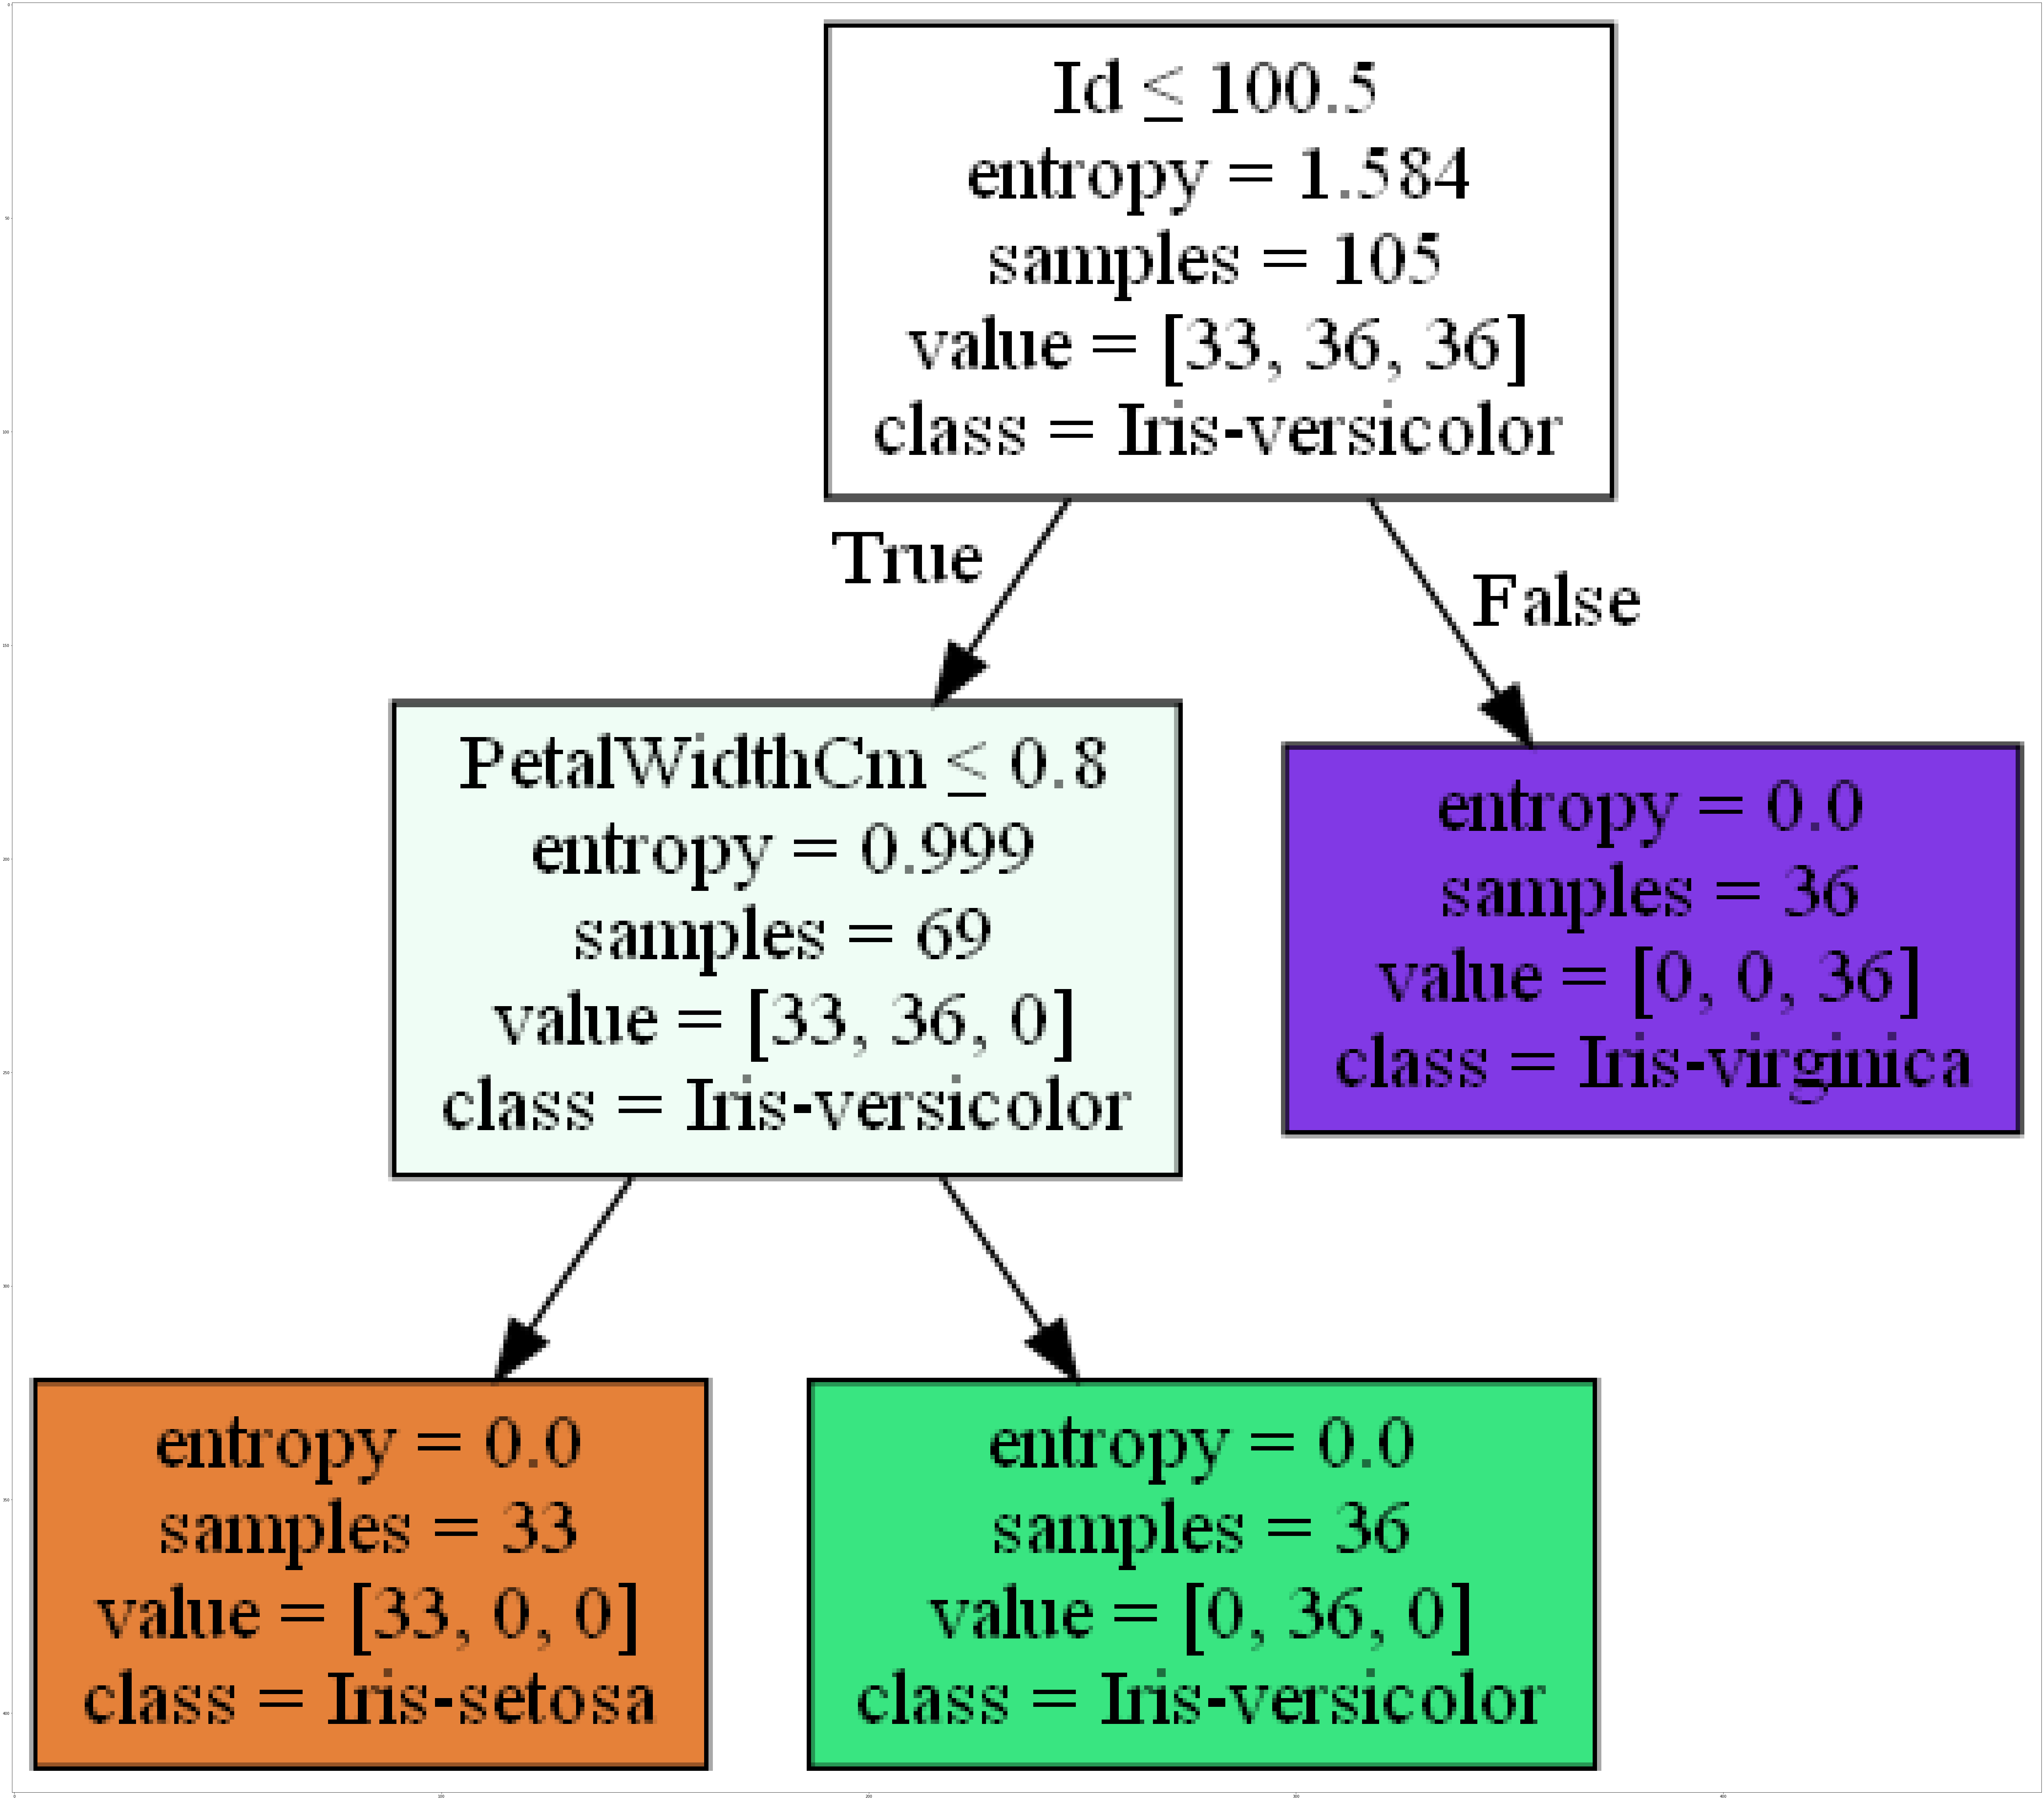

In [15]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:5]
out=tree.export_graphviz(SpeciesTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')